In [1]:
import os

os.environ["http_proxy"] = "http://proxy50.adm.toyota.co.jp:15520"
os.environ["https_proxy"] = "http://proxy50.adm.toyota.co.jp:15520"

In [2]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, revision="fp16")
pipe = pipe.to("cuda")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

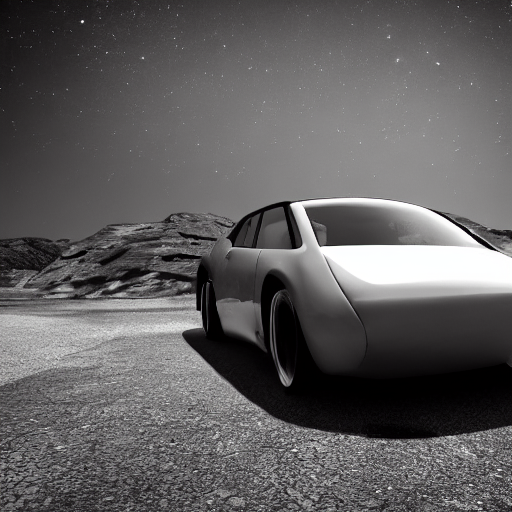

In [40]:
prompt = "car in the space"

def null_safety(images, **kwargs):
    return images, False
 
pipe.safety_checker = null_safety

from torch import autocast
with autocast("cuda"):
        image = pipe(prompt).images[0]

image